In [7]:
import os

# List files in the directory (replaces 'ls -al')
print(os.listdir('cb_2020_us_cousub_500k'))

['cb_2020_us_cousub_500k.cpg', 'cb_2020_us_cousub_500k.dbf', 'cb_2020_us_cousub_500k.prj', 'cb_2020_us_cousub_500k.shp', 'cb_2020_us_cousub_500k.shp.ea.iso.xml', 'cb_2020_us_cousub_500k.shp.iso.xml', 'cb_2020_us_cousub_500k.shx']


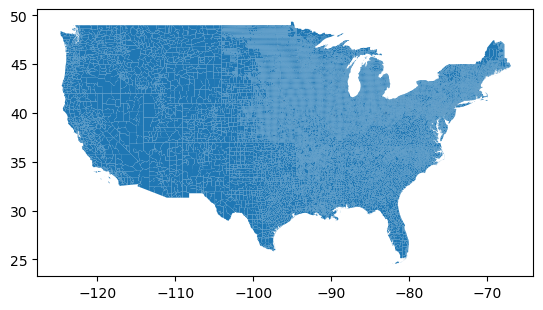

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

#1.  Visualize the Map of the United States:
# Load the shapefile (ensure the file path is correct)
USA = gpd.read_file('cb_2020_us_cousub_500k/cb_2020_us_cousub_500k.shp')

# Filter for contiguous 48 states
contiguous_states = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','ID','IL','IN','IA',
                    'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV',
                    'NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD',
                    'TN','TX','UT','VT','VA','WA','WV','WI','WY']
contiguous_data = USA[USA['STUSPS'].isin(contiguous_states)]

contiguous_data.plot()
plt.show()

In [22]:
USA.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [23]:
#Base Map of the USA
#creating a visualization of the county subdivisions in the U.S., 
#making it easy to analyze or build on top of it.

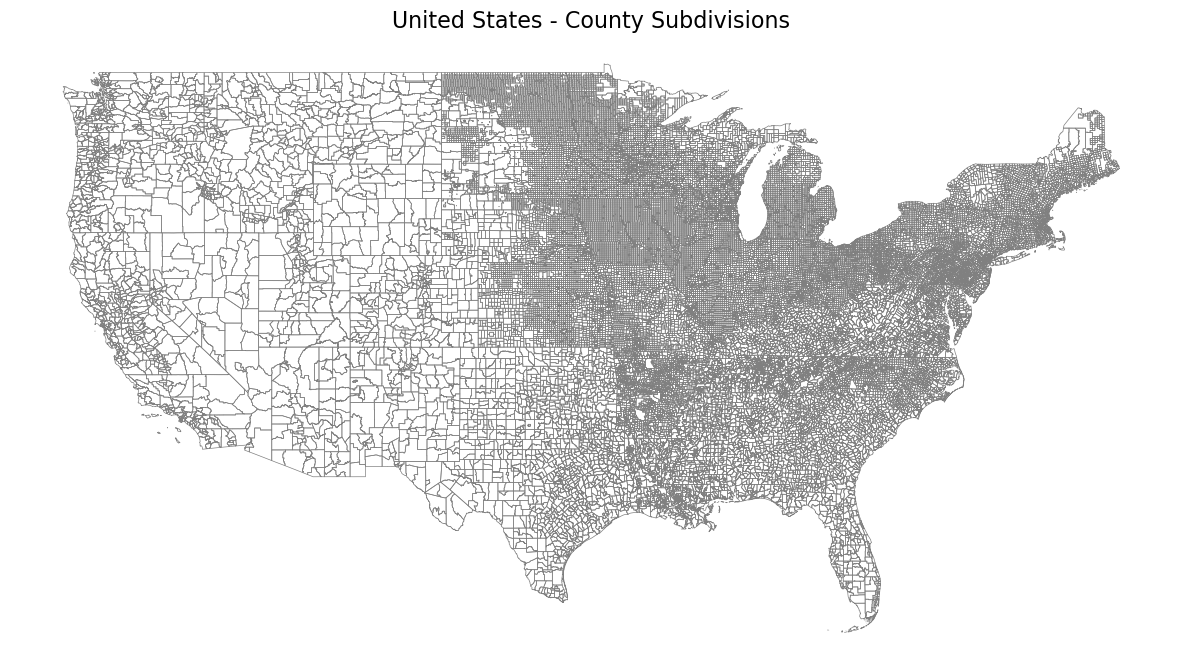

In [26]:
# Create base map
fig, ax = plt.subplots(figsize=(15, 10))

# Plot state boundaries
contiguous_data.boundary.plot(ax=ax, linewidth=0.5, color='gray')

# Customize the map
ax.set_title('United States - County Subdivisions', fontsize=16)
ax.set_axis_off()

# Save the base map
plt.savefig('Aty_US_BaseMap.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#Data Distribution
#choropleth map to visualize land area distribution across county subdivisions in the contiguous U.S


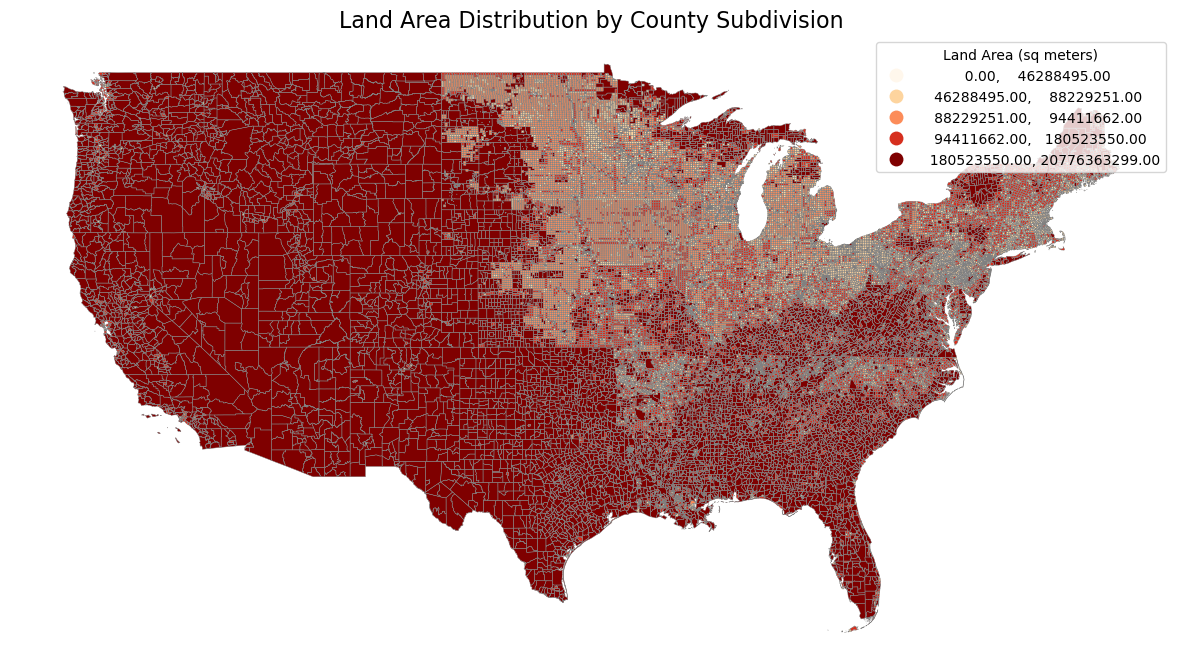

In [29]:
# Visualize land area distribution
fig, ax = plt.subplots(figsize=(15, 10))

# Plot subdivisions colored by land area
contiguous_data.plot(column='ALAND', ax=ax, legend=True,
                    legend_kwds={'title': "Land Area (sq meters)"},
                    cmap='OrRd', scheme='quantiles')

# Add state boundaries for reference
contiguous_data.boundary.plot(ax=ax, linewidth=0.3, color='gray')

# Customize
ax.set_title('Land Area Distribution by County Subdivision', fontsize=16)
ax.set_axis_off()

# Save
plt.savefig('Aty_LandArea_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#1. Top 10 States by Number of Subdivisions
#bar chart that visualizes the top 10 states with the highest number of county subdivisions

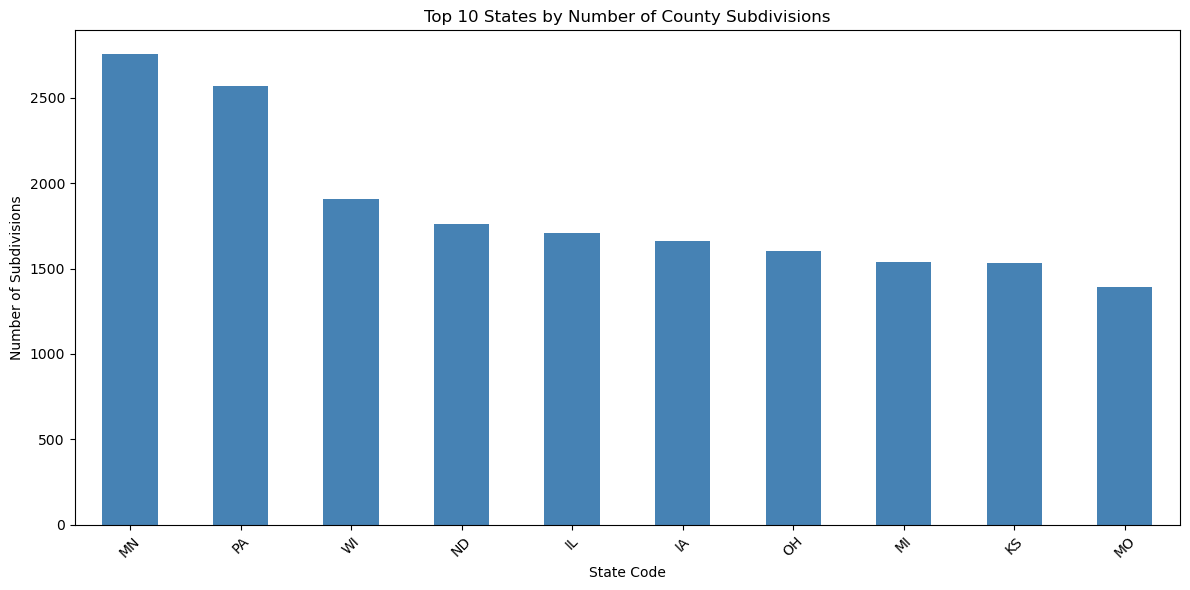

In [31]:
# Count subdivisions per state
subdiv_counts = contiguous_data.groupby('STUSPS').size().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
subdiv_counts.plot(kind='bar', color='steelblue')
plt.title('Top 10 States by Number of County Subdivisions')
plt.ylabel('Number of Subdivisions')
plt.xlabel('State Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Aty_SubdivisionsPerState.png', dpi=300)
plt.show()

In [ ]:
#2. Land Area Distribution by State
#pie chart illustrates the distribution of total land area among the top 10 states based on county subdivisions & it shows in percentages.


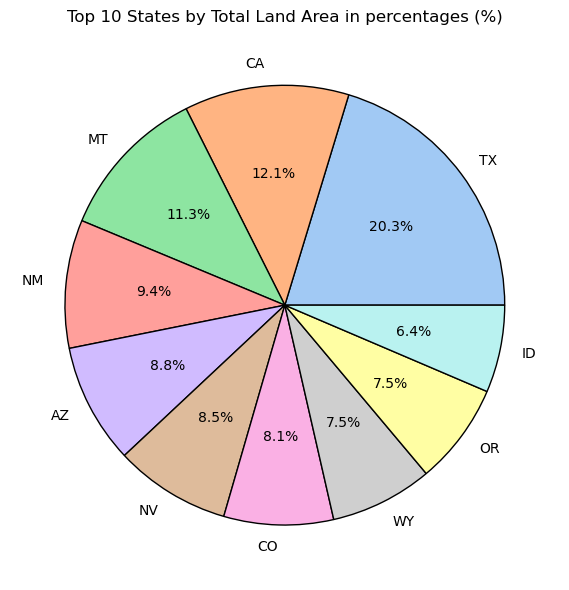

In [41]:
import seaborn as sns

# Calculate total land area by state
land_by_state = contiguous_data.groupby('STUSPS')['ALAND'].sum().sort_values(ascending=False)

# Define pastel colors
colors = sns.color_palette('pastel')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot using Matplotlib's `pie()` method
ax.pie(land_by_state.head(10), labels=land_by_state.head(10).index,
       colors=colors, autopct='%1.1f%%',
       wedgeprops={'linewidth': 1, 'edgecolor': 'black'})

# Title
ax.set_title('Top 10 States by Total Land Area in percentages (%)')



plt.tight_layout()
plt.savefig('Aty_LandAreaByState.png', dpi=300)
plt.show()


In [ ]:
#Water Area vs Land Area Correlation
#This is a scatter plot that illustrate the relationship between land area (ALAND) and water area (AWATER) across county subdivisions
# +1, larger land areas tend to have larger water areas.
#close to 0, land and water areas are not strongly linked.
#If the correlation is negative, counties with larger land areas may have smaller water bodies.
#Since it is USA I think  a positive but weak correlation—many large land areas don't necessarily contain large water bodies.

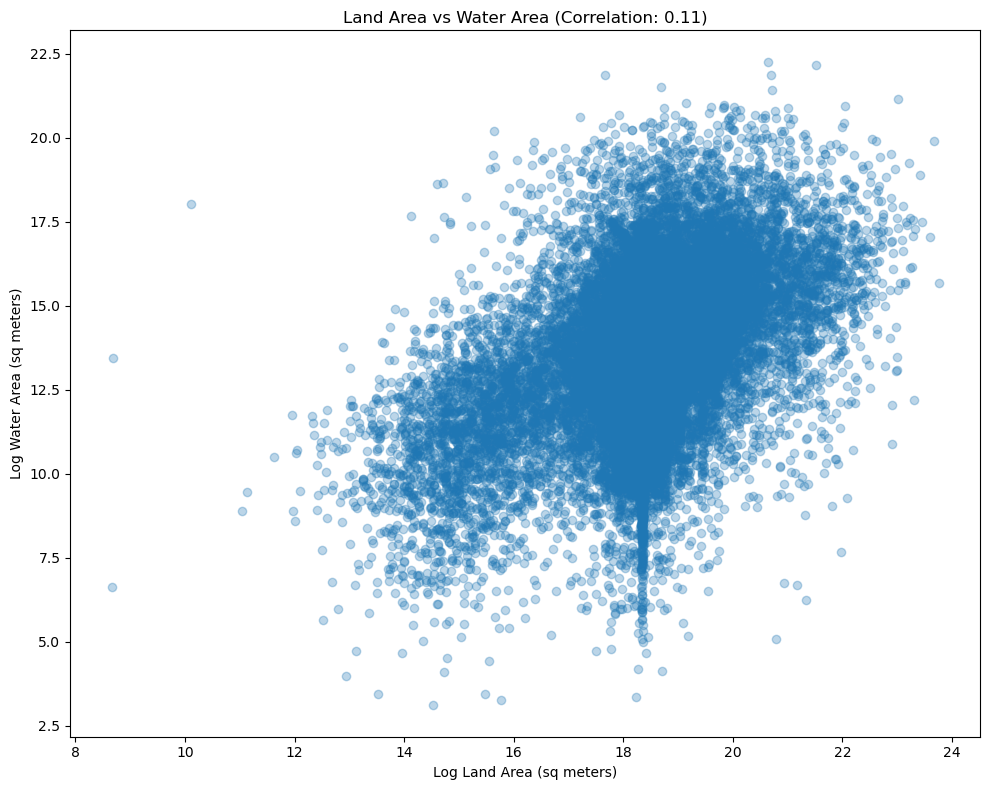

In [45]:
# Filter out rows where either ALAND or AWATER is 0
filtered_data = contiguous_data[(contiguous_data['ALAND'] > 0) & (contiguous_data['AWATER'] > 0)]

# Calculate correlation on filtered data
correlation = filtered_data['ALAND'].corr(filtered_data['AWATER'])

# Scatter plot with filtered data
plt.figure(figsize=(10, 8))
plt.scatter(np.log(filtered_data['ALAND']), np.log(filtered_data['AWATER']), alpha=0.3)
plt.title(f'Land Area vs Water Area (Correlation: {correlation:.2f})')
plt.xlabel('Log Land Area (sq meters)')
plt.ylabel('Log Water Area (sq meters)')
plt.tight_layout()
plt.savefig('YourName_LandWaterCorrelation.png', dpi=300)
plt.show()

In [ ]:
#Average Subdivision Size by State
#bar chart displaying the top 10 states ranked by the average county subdivision size (measured in square meters)
#Western states might have large county subdivisions due to low population density.
#Northeastern states like Rhode Island or Massachusetts may have smaller subdivisions because denser populations small size.
#States with large rural areas will likely dominate the rankings.

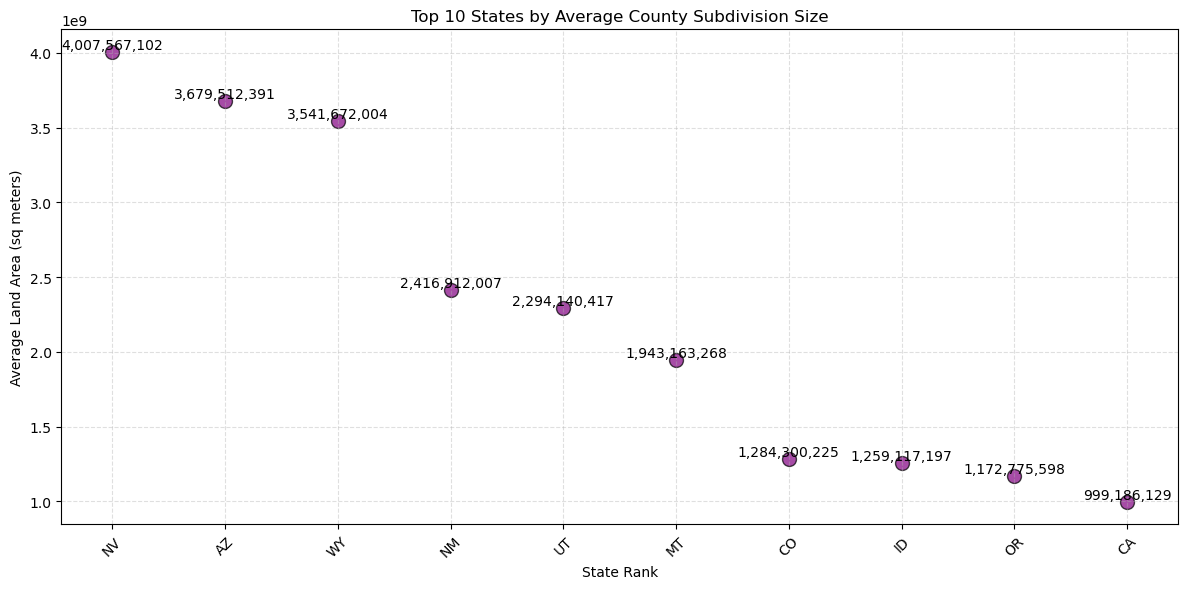

In [56]:
# Calculate average size
avg_size = contiguous_data.groupby('STUSPS')['ALAND'].mean().sort_values(ascending=False).head(10)

# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x=range(len(avg_size)), y=avg_size.values, 
            color='purple', s=100, alpha=0.7, edgecolor='black')

# Customize the plot
plt.title('Top 10 States by Average County Subdivision Size')
plt.ylabel('Average Land Area (sq meters)')
plt.xlabel('State Rank')
plt.xticks(range(len(avg_size)), avg_size.index, rotation=45)

# Add value labels
for i, (state, size) in enumerate(avg_size.items()):
    plt.text(i, size, f'{size:,.0f}', ha='center', va='bottom')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig('Atye_AvgSubdivisionSize_Scatter.png', dpi=300)
plt.show()

In [47]:
#this graph t displaying the top 10 most common county subdivision types in the dataset
#The tallest bars will represent the most common county subdivision types in the dataset.

In [61]:
# Get value counts of all subdivision types
subdiv_counts = contiguous_data['LSAD'].value_counts()

print("Subdivision Type Codes and Counts:")
print(subdiv_counts.to_string())

Subdivision Type Codes and Counts:
LSAD
44    17583
22     5154
43     3740
25     2732
28     2346
21     1222
29      816
47      532
27      521
46      299
45      173
30      141
49      118
39       32
86       18
32        9
42        6
31        4
36        4
00        3
37        3


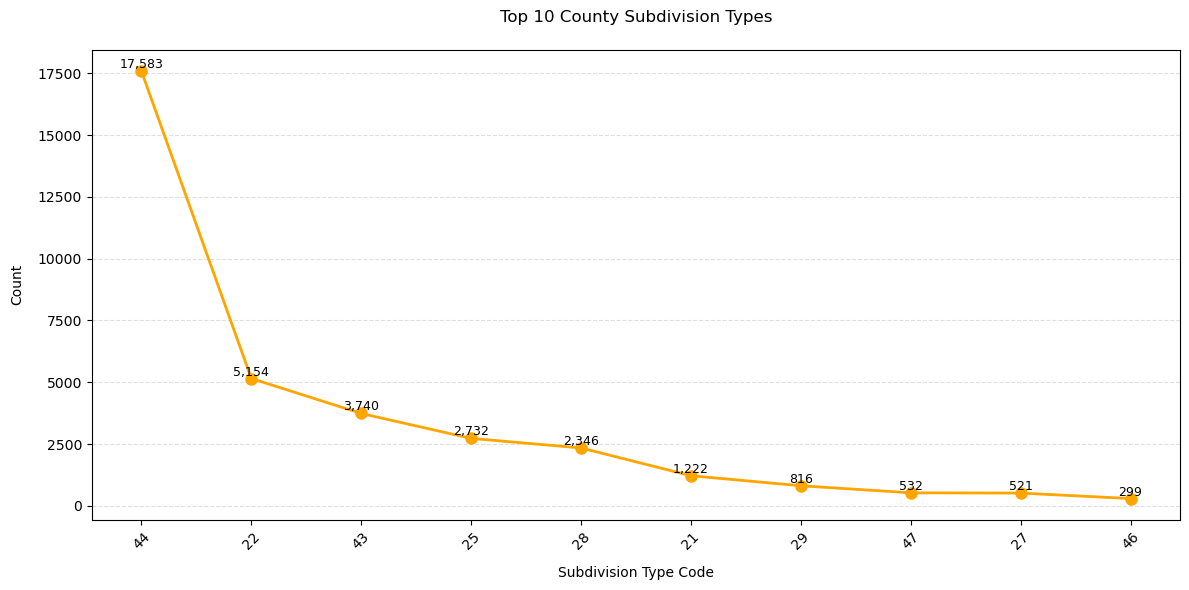

In [62]:
# Count subdivision types
subdiv_types = contiguous_data['LSAD'].value_counts().head(10)

# Create line plot
plt.figure(figsize=(12, 6))
subdiv_types.plot(kind='line', 
                 color='orange', 
                 marker='o',
                 markersize=8,
                 linewidth=2,
                 linestyle='-')

# Customize the plot
plt.title('Top 10 County Subdivision Types', pad=20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Subdivision Type Code', labelpad=10)
plt.xticks(range(len(subdiv_types)), subdiv_types.index, rotation=45)

# Add value labels
for x, y in enumerate(subdiv_types):
    plt.text(x, y, f'{y:,}', 
            ha='center', 
            va='bottom',
            fontsize=9)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig('Aty_SubdivisionTypes_Line.png', dpi=300, bbox_inches='tight')
plt.show()